In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
df['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

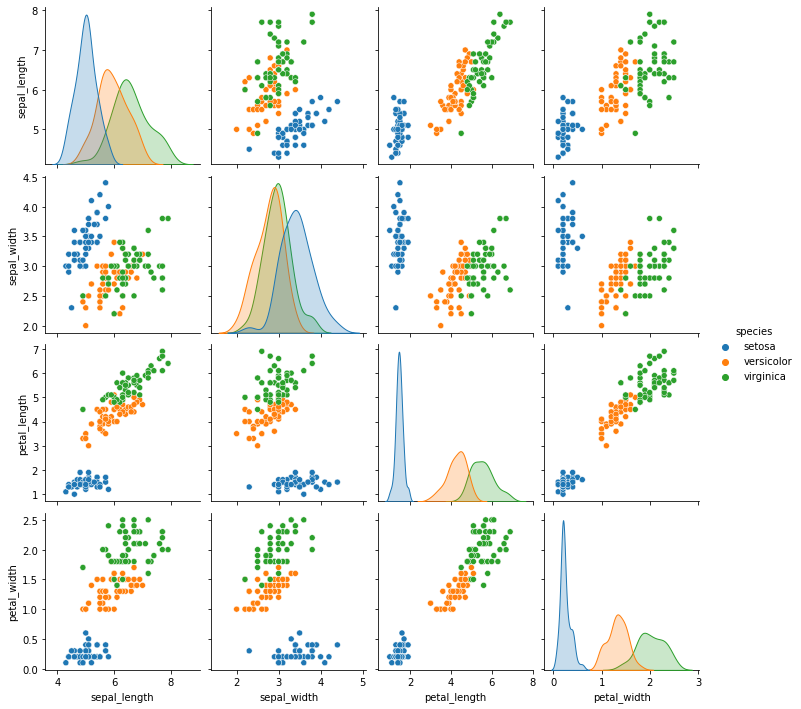

In [4]:
sns.pairplot(df, hue='species');

In [5]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


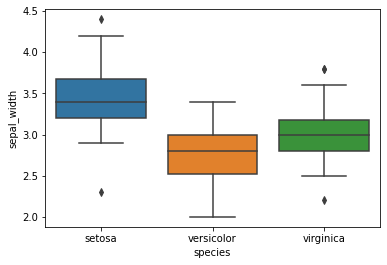

In [8]:
sns.boxplot(x='species', y='sepal_width', data = df);

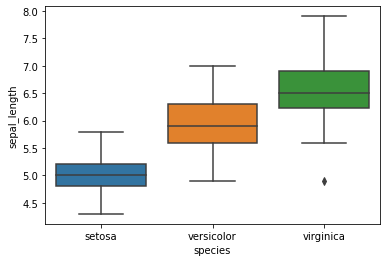

In [9]:
sns.boxplot(x='species', y='sepal_length', data = df);

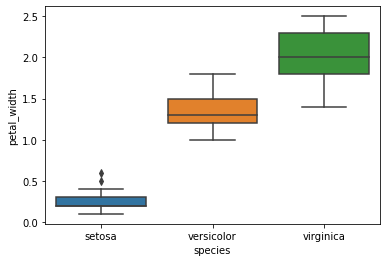

In [10]:
sns.boxplot(x='species', y='petal_width', data = df);

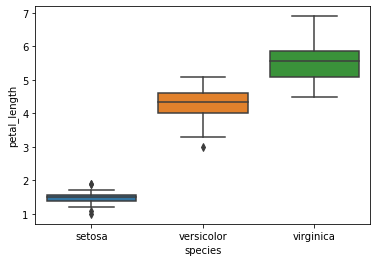

In [11]:
sns.boxplot(x='species', y='petal_length', data = df);

In [12]:
from scipy.stats import f_oneway

In [17]:
setosa_mask = df['species'] == 'setosa'
versicolor_mask = df['species'] == 'versicolor'
virginica_mask = df['species'] == 'virginica'
_, p = f_oneway(df[setosa_mask]['sepal_length'],
        df[versicolor_mask]['sepal_length'],
        df[virginica_mask]['sepal_length'])
print(p)

1.6696691907693826e-31


In [16]:
if p <= 0.05:
    print('Columns are correlated / Dependent (reject H0)')
else:
    print('Columns are not correlated / Independent (H0 holds true)')

Columns are correlated / Dependent (reject H0)


In [16]:
if p <= 0.05:
    print('Columns are correlated / Dependent (reject H0)')
else:
    print('Columns are not correlated / Independent (H0 holds true)')

Columns are correlated / Dependent (reject H0)


In [18]:
setosa_mask = df['species'] == 'setosa'
versicolor_mask = df['species'] == 'versicolor'
virginica_mask = df['species'] == 'virginica'
_, p = f_oneway(df[setosa_mask]['sepal_width'],
        df[versicolor_mask]['sepal_width'],
        df[virginica_mask]['sepal_width'])
print(p)

4.492017133309115e-17


In [19]:
if p <= 0.05:
    print('Columns are correlated / Dependent (reject H0)')
else:
    print('Columns are not correlated / Independent (H0 holds true)')

Columns are correlated / Dependent (reject H0)


In [20]:
X = df.iloc[:,[1,2]].values
y = df.iloc[:,-1].values
print(X.shape, y.shape)

(150, 2) (150,)


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
#Split the Data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 2) (30, 2) (120,) (30,)


In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
ypred = knn_model.predict(X_test)
print(knn_model.score(X_test, y_test))

0.9


In [25]:
# As per practitioners rule square root of no of training observations
120**0.5

10.954451150103322

In [26]:
# by default Eucledian distance meaning p = 2
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, y_train)
ypred = knn_model.predict(X_test)
print(knn_model.score(X_test, y_test))

0.9


In [20]:
ypred

array(['versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'virginica', 'virginica',
       'virginica', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'setosa'], dtype=object)

In [27]:
from sklearn.metrics import plot_confusion_matrix, classification_report

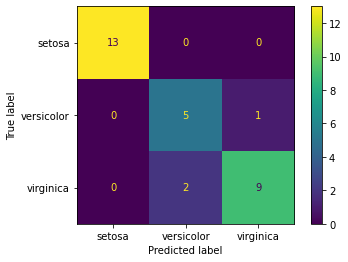

In [28]:
plot_confusion_matrix(knn_model, X_test, y_test);

In [30]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.71      0.83      0.77         6
   virginica       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.87      0.88      0.88        30
weighted avg       0.91      0.90      0.90        30



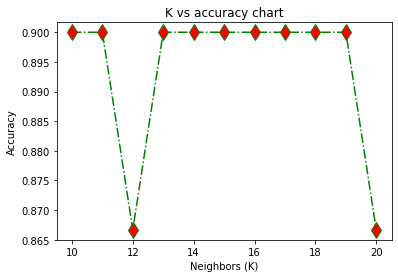

In [33]:
acc = []
for i in range(10, 21):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    acc.append(knn_model.fit(X_train, y_train).score(X_test, y_test))

plt.plot(range(10,21), acc, marker='d',  ls='-.', mfc='r', color='g', ms= 12)
plt.xlabel("Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("K vs accuracy chart")
plt.show()

In [34]:
X_test.shape

(30, 2)

In [35]:
# check the test data boundaries
f1 = np.arange(X_test[:,0].min()-1, X_test[:,0].max()+1, 0.05)
f2  = np.arange(X_test[:,1].min()-1, X_test[:,1].max()+1, 0.05)
F1 , F2  = np.meshgrid(f1,f2)

In [36]:
print(F1.shape, F2.shape)

(152, 78) (152, 78)


In [39]:
predictions = knn_model.predict(np.c_[F1.ravel(), F2.ravel()])
len(predictions)

11856

In [40]:
predictions

array(['setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica',
       'virginica'], dtype=object)

In [41]:
predictions = np.where(predictions=='setosa',0,predictions)
predictions = np.where(predictions=='versicolor',1,predictions)
predictions = np.where(predictions=='virginica',2,predictions)
predictions

array([0, 0, 0, ..., 2, 2, 2], dtype=object)

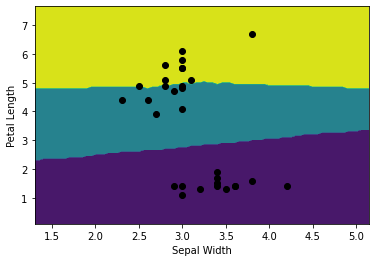

In [43]:
Z = predictions.reshape(F1.shape)
plt.contourf(F1,F2,Z, cmap='viridis')
plt.scatter(X_test[:,0], X_test[:,1], c = 'k')
plt.xlabel("Sepal Width")
plt.ylabel("Petal Length")
plt.show()